In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

C:\Users\Rohit Saini\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Importing the Dataset

In [2]:
df_uber = pd.read_parquet('yellow_tripdata_2013-12.parquet')

# Getting the first 5 rows of Data

In [3]:
df_uber.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2013-12-01 00:23:19,2013-12-01 00:31:48,2,2.2,1,N,114,170,2,9.0,0.5,0.5,0.00,0.00,0.0,10.00,None,None
1,1,2013-12-01 00:51:49,2013-12-01 01:01:04,1,1.6,1,N,48,229,2,7.5,0.5,0.5,0.00,0.00,0.0,8.50,None,None
2,1,2013-12-01 00:09:39,2013-12-01 00:11:59,1,0.3,1,N,79,107,1,3.5,0.5,0.5,0.90,0.00,0.0,5.40,None,None
3,1,2013-12-01 00:52:52,2013-12-01 01:02:26,1,1.9,1,N,95,134,1,9.0,0.5,0.5,3.00,0.00,0.0,13.00,None,None
4,1,2013-12-01 00:19:48,2013-12-01 00:57:07,1,21.8,2,N,132,127,1,52.0,0.0,0.5,11.55,5.33,0.0,69.38,None,None


# Getting the Shape of Data

In [4]:
df_uber.shape

(13971118, 19)

In [5]:
print('Number of Rows',df_uber.shape[0])
print('Number of Columns',df_uber.shape[1])

Number of Rows 13971118
Number of Columns 19


# Basic information about the columns and their Datatypes

In [6]:
df_uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13971118 entries, 0 to 13971117
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        int64         
 4   trip_distance          float64       
 5   RatecodeID             int64         
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   object        
 18  airport_fee         

# Checking fro Null Values

In [7]:
df_uber.isnull().sum()

VendorID                        0
tpep_pickup_datetime            0
tpep_dropoff_datetime           0
passenger_count                 0
trip_distance                   0
RatecodeID                      0
store_and_fwd_flag        7058912
PULocationID                    0
DOLocationID                    0
payment_type                    0
fare_amount                     0
extra                           0
mta_tax                         0
tip_amount                      0
tolls_amount                    0
improvement_surcharge           0
total_amount                    0
congestion_surcharge     13971118
airport_fee              13971118
dtype: int64

From the above result, There are 13971118 rows in dataset and all rows corresponding to 'congestion_surcharge'
and 'airport_fee' are Null.

# Dropping the Null Values

In [8]:
df_uber_data = df_uber.drop(['store_and_fwd_flag','congestion_surcharge','airport_fee'],axis=1)

In [9]:
df_uber_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2013-12-01 00:23:19,2013-12-01 00:31:48,2,2.2,1,114,170,2,9.0,0.5,0.5,0.00,0.00,0.0,10.00
1,1,2013-12-01 00:51:49,2013-12-01 01:01:04,1,1.6,1,48,229,2,7.5,0.5,0.5,0.00,0.00,0.0,8.50
2,1,2013-12-01 00:09:39,2013-12-01 00:11:59,1,0.3,1,79,107,1,3.5,0.5,0.5,0.90,0.00,0.0,5.40
3,1,2013-12-01 00:52:52,2013-12-01 01:02:26,1,1.9,1,95,134,1,9.0,0.5,0.5,3.00,0.00,0.0,13.00
4,1,2013-12-01 00:19:48,2013-12-01 00:57:07,1,21.8,2,132,127,1,52.0,0.0,0.5,11.55,5.33,0.0,69.38


In [10]:
df_uber_data.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

# Checking for Duplicate Values

In [11]:
dup_data = df_uber_data.duplicated().any()

In [12]:
dup_data

True

# Dropping Duplicate Values

In [13]:
df_uber_data.drop_duplicates(inplace=True)

In [14]:
df_uber_data.shape

(13970973, 16)

Initially we have 13971118 rows of data but after Data Cleaning we are left with 13970973 rows.
depicting we have removed 145 rows from the original Dataset

# Getting Basic Statistics of the Data

In [15]:
df_uber_data.describe().T

,count,mean,min,25%,50%,75%,max,std
VendorID,13970973.0,1.505129,1.0,1.0,2.0,2.0,2.0,0.499974
tpep_pickup_datetime,13970973,2013-12-15 22:17:41.092807168,2013-12-01 00:00:00,2013-12-08 09:01:31,2013-12-15 11:46:00,2013-12-22 17:13:09,2013-12-31 23:59:57,NaN
tpep_dropoff_datetime,13970973,2013-12-15 22:30:50.497889280,2013-12-01 00:00:00,2013-12-08 09:10:59,2013-12-15 11:57:00,2013-12-22 17:29:48,2014-01-03 16:31:27,NaN
passenger_count,13970973.0,1.723463,0.0,1.0,1.0,2.0,9.0,1.372883
trip_distance,13970973.0,2.924561,0.0,1.01,1.75,3.2,100.0,3.465811
RatecodeID,13970973.0,1.060037,1.0,1.0,1.0,1.0,99.0,1.587817
PULocationID,13970973.0,161.790773,1.0,113.0,161.0,233.0,265.0,67.618515
DOLocationID,13970973.0,160.542714,1.0,107.0,162.0,233.0,265.0,70.41789
payment_type,13970973.0,1.482884,1.0,1.0,1.0,2.0,5.0,0.553409
fare_amount,13970973.0,12.628032,2.5,6.5,9.5,14.5,500.0,10.505405


from above results we get to know that column named 'improvement_surcharge' has all values 0.

# checking for improvement_surcharge column

In [16]:
df_uber_data['improvement_surcharge'].value_counts()

improvement_surcharge
0.0    13970973
Name: count, dtype: int64

In [17]:
df_uber_data['tolls_amount'].value_counts()

tolls_amount
0.00     13308971
5.33       612374
11.00       14889
9.00         6310
2.44         6103
           ...   
11.67           1
10.47           1
0.24            1
13.18           1
17.80           1
Name: count, Length: 628, dtype: int64

# Dropping not required columns from the Dataset to improve efficiency of further analysis

In [18]:
df_uber_data = df_uber_data.drop(['VendorID','RatecodeID'],axis=1)

In [19]:
df_uber_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2013-12-01 00:23:19,2013-12-01 00:31:48,2,2.2,114,170,2,9.0,0.5,0.5,0.00,0.00,0.0,10.00
1,2013-12-01 00:51:49,2013-12-01 01:01:04,1,1.6,48,229,2,7.5,0.5,0.5,0.00,0.00,0.0,8.50
2,2013-12-01 00:09:39,2013-12-01 00:11:59,1,0.3,79,107,1,3.5,0.5,0.5,0.90,0.00,0.0,5.40
3,2013-12-01 00:52:52,2013-12-01 01:02:26,1,1.9,95,134,1,9.0,0.5,0.5,3.00,0.00,0.0,13.00
4,2013-12-01 00:19:48,2013-12-01 00:57:07,1,21.8,132,127,1,52.0,0.0,0.5,11.55,5.33,0.0,69.38


# Getting distinct Pickup Locations

In [20]:
df_uber_data['PULocationID'].nunique()

263

In [21]:
df_uber_data['PULocationID'].unique()

array([114,  48,  79,  95, 132,  90, 161, 164, 186, 113, 249, 246, 142,
       229, 234, 163, 230, 263, 166, 148, 231, 144, 107,  74, 151,  43,
       239, 162,  68, 158, 143, 238, 170, 100, 137, 125,   4, 262, 140,
       141,  50, 255, 181, 256, 236, 112, 261, 233, 145, 237, 264,  13,
       244,  42,  41,  24, 211,  33,  75, 116, 224, 232,  87,  80,  45,
       138,  97,  37,   7,  88,  52, 265,  25, 226, 152, 106,  66, 207,
       193, 127, 157, 146, 209,  40, 190,  12, 179,  49,  17,  82, 257,
        91,  34, 247, 129, 189, 202,  65,  76,   6, 223,  36,  54, 134,
       225,  61, 159, 243,  96, 217,  70, 188, 228, 260,  51, 196, 215,
       194,  14, 123, 198, 177,   5, 195, 220,  83,  93, 216, 168,  89,
        62,  92,  56, 139,  28, 128,  26,  67, 165,  10, 160, 173, 121,
        81,  53, 197, 130, 227, 214, 178, 248, 133,  69,  85, 192, 119,
       242, 212, 210, 102,  22, 118,  16, 213, 252, 169, 111,  21, 240,
       171,   8, 167,  58,  63,  35, 124,  29,  71, 126, 155, 25

# Getting distinct Dropoff Locations

In [22]:
df_uber_data['DOLocationID'].nunique()

263

In [23]:
df_uber_data['DOLocationID'].unique()

array([170, 229, 107, 134, 127,  48, 161, 164,  87, 100, 113,  14, 116,
       114, 137, 238,  66, 186, 249, 142, 230, 237, 140,  75, 231,  43,
       146, 234, 162, 224, 148, 261, 166,  24,  79, 263, 233,  61, 239,
       226,  68, 163, 243, 158, 244, 246, 264, 181, 144, 151, 262, 141,
       125, 112, 256,  17,  50,  90, 223,  13,   7,  41, 236, 205, 182,
       145, 152, 225,   4,  37, 232, 189,  42,  74,  21,  62,  88,  80,
        97, 211, 255, 265, 143,  22,  49,  33,  65,  56, 168, 209,  45,
        95, 133, 129,  52,  40,  10,  53, 213, 198, 190, 260, 179, 257,
       106,  25, 188,  36,  82,  70, 165,  18,  83,  91, 247, 160,  89,
       153, 254,  39,  54,   9, 220, 167, 227, 216, 102, 217, 121, 191,
       136, 202, 119,  81, 195, 174, 185,  98, 130, 131, 124, 157,  76,
       241, 200, 159, 169, 258, 196, 118, 228,  94,  64, 184, 138, 193,
        47,  85,  69, 147, 180, 214, 201, 242,  15,  72, 149,  57,  28,
        73,  11, 240, 173,  20,  92,  16, 175, 132, 252, 171, 23

# Extracting the Year, Date, Month, Day, Hour from the column named 'tpep_pickup_datetime' for further analysis

In [24]:
df_uber_data['year'] = df_uber_data['tpep_pickup_datetime'].dt.year
df_uber_data['date'] = df_uber_data['tpep_pickup_datetime'].dt.date
df_uber_data['month'] = df_uber_data['tpep_pickup_datetime'].dt.month
df_uber_data['day'] = df_uber_data['tpep_pickup_datetime'].dt.day_name()
df_uber_data['hour'] = df_uber_data['tpep_pickup_datetime'].dt.hour

In [25]:
df_uber_data.tail()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,year,date,month,day,hour
13971113,2013-12-31 23:24:49,2013-12-31 23:28:31,1,0.7,50,50,2,5.0,0.5,0.5,0.0,0.0,0.0,6.0,2013,2013-12-31,12,Tuesday,23
13971114,2013-12-31 23:00:10,2013-12-31 23:05:36,1,1.1,237,162,2,6.5,0.5,0.5,0.0,0.0,0.0,7.5,2013,2013-12-31,12,Tuesday,23
13971115,2013-12-31 23:11:53,2013-12-31 23:22:32,1,1.8,236,239,2,9.5,0.5,0.5,0.0,0.0,0.0,10.5,2013,2013-12-31,12,Tuesday,23
13971116,2013-12-31 23:29:38,2013-12-31 23:33:16,1,0.7,238,151,2,5.0,0.5,0.5,0.0,0.0,0.0,6.0,2013,2013-12-31,12,Tuesday,23
13971117,2013-12-31 23:35:45,2013-12-31 23:48:30,1,3.5,151,161,2,14.0,0.5,0.5,0.0,0.0,0.0,15.0,2013,2013-12-31,12,Tuesday,23


# Calculating the trip duration

In [26]:
df_uber_data['Trip_duration']=df_uber_data['tpep_dropoff_datetime']-df_uber_data['tpep_pickup_datetime']
df_uber_data['Trip_duration']=df_uber_data['Trip_duration'].dt.seconds/60

In [27]:
df_uber_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,year,date,month,day,hour,Trip_duration
0,2013-12-01 00:23:19,2013-12-01 00:31:48,2,2.2,114,170,2,9.0,0.5,0.5,0.00,0.00,0.0,10.00,2013,2013-12-01,12,Sunday,0,8.483333
1,2013-12-01 00:51:49,2013-12-01 01:01:04,1,1.6,48,229,2,7.5,0.5,0.5,0.00,0.00,0.0,8.50,2013,2013-12-01,12,Sunday,0,9.250000
2,2013-12-01 00:09:39,2013-12-01 00:11:59,1,0.3,79,107,1,3.5,0.5,0.5,0.90,0.00,0.0,5.40,2013,2013-12-01,12,Sunday,0,2.333333
3,2013-12-01 00:52:52,2013-12-01 01:02:26,1,1.9,95,134,1,9.0,0.5,0.5,3.00,0.00,0.0,13.00,2013,2013-12-01,12,Sunday,0,9.566667
4,2013-12-01 00:19:48,2013-12-01 00:57:07,1,21.8,132,127,1,52.0,0.0,0.5,11.55,5.33,0.0,69.38,2013,2013-12-01,12,Sunday,0,37.316667


In [28]:
df_uber_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13970973 entries, 0 to 13971117
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   tpep_pickup_datetime   datetime64[ns]
 1   tpep_dropoff_datetime  datetime64[ns]
 2   passenger_count        int64         
 3   trip_distance          float64       
 4   PULocationID           int64         
 5   DOLocationID           int64         
 6   payment_type           int64         
 7   fare_amount            float64       
 8   extra                  float64       
 9   mta_tax                float64       
 10  tip_amount             float64       
 11  tolls_amount           float64       
 12  improvement_surcharge  float64       
 13  total_amount           float64       
 14  year                   int32         
 15  date                   object        
 16  month                  int32         
 17  day                    object        
 18  hour                   in

# Calculationg Average speed (mph) during the trips

In [29]:
df_uber_data['Average_speed_mph']= df_uber_data['trip_distance']/(df_uber_data['Trip_duration']/60)

In [30]:
df_uber_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,...,tolls_amount,improvement_surcharge,total_amount,year,date,month,day,hour,Trip_duration,Average_speed_mph
0,2013-12-01 00:23:19,2013-12-01 00:31:48,2,2.2,114,170,2,9.0,0.5,0.5,...,0.00,0.0,10.00,2013,2013-12-01,12,Sunday,0,8.483333,15.559921
1,2013-12-01 00:51:49,2013-12-01 01:01:04,1,1.6,48,229,2,7.5,0.5,0.5,...,0.00,0.0,8.50,2013,2013-12-01,12,Sunday,0,9.250000,10.378378
2,2013-12-01 00:09:39,2013-12-01 00:11:59,1,0.3,79,107,1,3.5,0.5,0.5,...,0.00,0.0,5.40,2013,2013-12-01,12,Sunday,0,2.333333,7.714286
3,2013-12-01 00:52:52,2013-12-01 01:02:26,1,1.9,95,134,1,9.0,0.5,0.5,...,0.00,0.0,13.00,2013,2013-12-01,12,Sunday,0,9.566667,11.916376
4,2013-12-01 00:19:48,2013-12-01 00:57:07,1,21.8,132,127,1,52.0,0.0,0.5,...,5.33,0.0,69.38,2013,2013-12-01,12,Sunday,0,37.316667,35.051362


# Categorizing the 'Payment type' based on the payment_type value

In [31]:
# 1 stands for Credit Card payment
# 2 stands for Cash payment
# 3 stands for No Charge
# 4 stands for Dispute
# 5 stands for Unknown 

def payment_type(payment_type):
    if payment_type ==1:      
        return 'Credit Card'  
    elif payment_type ==2:
        return 'Cash'
    elif payment_type ==3:
        return 'No Charge'
    elif payment_type ==4:
        return 'Dispute'
    elif payment_type ==5:
        return 'Unknown'
    else:
        return 'Voided Trip'

In [32]:
df_uber_data['payment_method']= df_uber_data['payment_type'].apply(payment_type)

In [33]:
df_uber_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,...,improvement_surcharge,total_amount,year,date,month,day,hour,Trip_duration,Average_speed_mph,payment_method
0,2013-12-01 00:23:19,2013-12-01 00:31:48,2,2.2,114,170,2,9.0,0.5,0.5,...,0.0,10.00,2013,2013-12-01,12,Sunday,0,8.483333,15.559921,Cash
1,2013-12-01 00:51:49,2013-12-01 01:01:04,1,1.6,48,229,2,7.5,0.5,0.5,...,0.0,8.50,2013,2013-12-01,12,Sunday,0,9.250000,10.378378,Cash
2,2013-12-01 00:09:39,2013-12-01 00:11:59,1,0.3,79,107,1,3.5,0.5,0.5,...,0.0,5.40,2013,2013-12-01,12,Sunday,0,2.333333,7.714286,Credit Card
3,2013-12-01 00:52:52,2013-12-01 01:02:26,1,1.9,95,134,1,9.0,0.5,0.5,...,0.0,13.00,2013,2013-12-01,12,Sunday,0,9.566667,11.916376,Credit Card
4,2013-12-01 00:19:48,2013-12-01 00:57:07,1,21.8,132,127,1,52.0,0.0,0.5,...,0.0,69.38,2013,2013-12-01,12,Sunday,0,37.316667,35.051362,Credit Card


In [34]:
df_uber_data.isnull().sum()

tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count              0
trip_distance                0
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
year                         0
date                         0
month                        0
day                          0
hour                         0
Trip_duration                0
Average_speed_mph        27855
payment_method               0
dtype: int64

In [35]:
df_uber_data.describe().T

,count,mean,min,25%,50%,75%,max,std
tpep_pickup_datetime,13970973,2013-12-15 22:17:41.092807168,2013-12-01 00:00:00,2013-12-08 09:01:31,2013-12-15 11:46:00,2013-12-22 17:13:09,2013-12-31 23:59:57,NaN
tpep_dropoff_datetime,13970973,2013-12-15 22:30:50.497889280,2013-12-01 00:00:00,2013-12-08 09:10:59,2013-12-15 11:57:00,2013-12-22 17:29:48,2014-01-03 16:31:27,NaN
passenger_count,13970973.0,1.723463,0.0,1.0,1.0,2.0,9.0,1.372883
trip_distance,13970973.0,2.924561,0.0,1.01,1.75,3.2,100.0,3.465811
PULocationID,13970973.0,161.790773,1.0,113.0,161.0,233.0,265.0,67.618515
DOLocationID,13970973.0,160.542714,1.0,107.0,162.0,233.0,265.0,70.41789
payment_type,13970973.0,1.482884,1.0,1.0,1.0,2.0,5.0,0.553409
fare_amount,13970973.0,12.628032,2.5,6.5,9.5,14.5,500.0,10.505405
extra,13970973.0,0.31617,0.0,0.0,0.0,0.5,11.11,0.358764
mta_tax,13970973.0,0.497987,0.0,0.5,0.5,0.5,0.5,0.031664


From the above output we observed that there is some NaN values in Calculated column 
named Average_speed_mph showing there is some errors in refernce columns.

# Checking for errors 

In [36]:
df_uber_data['Trip_duration'].value_counts()

Trip_duration
6.000000      456545
7.000000      451930
5.000000      441168
8.000000      437898
9.000000      413897
               ...  
234.800000         1
119.266667         1
164.400000         1
93.883333          1
139.966667         1
Name: count, Length: 8108, dtype: int64

In [37]:
df_0_trips= df_uber_data['trip_distance'].value_counts()

In [38]:
df_0_trips.sort_values()

trip_distance
36.21         1
55.55         1
48.86         1
36.58         1
40.95         1
          ...  
1.20     295081
1.10     307898
0.80     312713
1.00     317213
0.90     317286
Name: count, Length: 4328, dtype: int64

# Removing the rows having both values 0 in columns 'trip_distance' and 'Trip_duration'

In [39]:
df_uber_data = df_uber_data.loc[(df_uber_data['trip_distance'] != 0) & (df_uber_data['Trip_duration'] != 0)]

In [40]:
rows_with_zero = df_uber_data.loc[(df_uber_data['trip_distance'] == 0) & (df_uber_data['Trip_duration'] == 0)]

In [41]:
rows_with_zero

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,...,improvement_surcharge,total_amount,year,date,month,day,hour,Trip_duration,Average_speed_mph,payment_method


# Setting 'id' as index for the dataset

In [42]:
df_uber_data['id']=df_uber_data.index

In [43]:
df_uber_data.describe().T

,count,mean,min,25%,50%,75%,max,std
tpep_pickup_datetime,13878292,2013-12-15 22:21:14.670610432,2013-12-01 00:00:00,2013-12-08 09:08:00,2013-12-15 11:49:53.500000,2013-12-22 17:16:03,2013-12-31 23:59:57,NaN
tpep_dropoff_datetime,13878292,2013-12-15 22:34:28.605650944,2013-12-01 00:01:00,2013-12-08 09:17:00,2013-12-15 12:00:27,2013-12-22 17:32:27,2014-01-01 01:44:11,NaN
passenger_count,13878292.0,1.725462,0.0,1.0,1.0,2.0,9.0,1.374445
trip_distance,13878292.0,2.942917,0.01,1.03,1.77,3.23,100.0,3.468518
PULocationID,13878292.0,161.648079,1.0,113.0,161.0,233.0,265.0,67.542426
DOLocationID,13878292.0,160.306299,1.0,107.0,162.0,233.0,265.0,70.323918
payment_type,13878292.0,1.480916,1.0,1.0,1.0,2.0,5.0,0.551656
fare_amount,13878292.0,12.566321,2.5,6.5,9.5,14.5,500.0,10.094098
extra,13878292.0,0.316881,0.0,0.0,0.0,0.5,10.5,0.35881
mta_tax,13878292.0,0.498552,0.0,0.5,0.5,0.5,0.5,0.026865


# Now the Dataset is clean and ready to do EDA and further analysis

In [44]:
df_uber_data.columns

Index(['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count',
       'trip_distance', 'PULocationID', 'DOLocationID', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'year', 'date', 'month', 'day',
       'hour', 'Trip_duration', 'Average_speed_mph', 'payment_method', 'id'],
      dtype='object')

# Rearranging columns order 

In [45]:
df_uber_data=df_uber_data.loc[:,['id','tpep_pickup_datetime','tpep_dropoff_datetime','passenger_count',
                         'PULocationID','DOLocationID','year','date','month', 'day','hour','trip_distance',
                          'Trip_duration','Average_speed_mph','fare_amount',
                          'tip_amount','total_amount','payment_method']]

In [46]:
df_uber_data['date'] = df_uber_data['tpep_pickup_datetime'].dt.date

In [47]:
df_uber_data.head()

,id,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,PULocationID,DOLocationID,year,date,month,day,hour,trip_distance,Trip_duration,Average_speed_mph,fare_amount,tip_amount,total_amount,payment_method
0,0,2013-12-01 00:23:19,2013-12-01 00:31:48,2,114,170,2013,2013-12-01,12,Sunday,0,2.2,8.483333,15.559921,9.0,0.00,10.00,Cash
1,1,2013-12-01 00:51:49,2013-12-01 01:01:04,1,48,229,2013,2013-12-01,12,Sunday,0,1.6,9.250000,10.378378,7.5,0.00,8.50,Cash
2,2,2013-12-01 00:09:39,2013-12-01 00:11:59,1,79,107,2013,2013-12-01,12,Sunday,0,0.3,2.333333,7.714286,3.5,0.90,5.40,Credit Card
3,3,2013-12-01 00:52:52,2013-12-01 01:02:26,1,95,134,2013,2013-12-01,12,Sunday,0,1.9,9.566667,11.916376,9.0,3.00,13.00,Credit Card
4,4,2013-12-01 00:19:48,2013-12-01 00:57:07,1,132,127,2013,2013-12-01,12,Sunday,0,21.8,37.316667,35.051362,52.0,11.55,69.38,Credit Card


In [48]:
df_uber_data=df_uber_data.loc[:,['id','tpep_pickup_datetime','tpep_dropoff_datetime','passenger_count',
                         'PULocationID','DOLocationID','year','date','month', 'day','hour','trip_distance',
                          'Trip_duration','Average_speed_mph','fare_amount',
                          'tip_amount','total_amount','payment_method']]

In [49]:
df_uber_data.head()

,id,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,PULocationID,DOLocationID,year,date,month,day,hour,trip_distance,Trip_duration,Average_speed_mph,fare_amount,tip_amount,total_amount,payment_method
0,0,2013-12-01 00:23:19,2013-12-01 00:31:48,2,114,170,2013,2013-12-01,12,Sunday,0,2.2,8.483333,15.559921,9.0,0.00,10.00,Cash
1,1,2013-12-01 00:51:49,2013-12-01 01:01:04,1,48,229,2013,2013-12-01,12,Sunday,0,1.6,9.250000,10.378378,7.5,0.00,8.50,Cash
2,2,2013-12-01 00:09:39,2013-12-01 00:11:59,1,79,107,2013,2013-12-01,12,Sunday,0,0.3,2.333333,7.714286,3.5,0.90,5.40,Credit Card
3,3,2013-12-01 00:52:52,2013-12-01 01:02:26,1,95,134,2013,2013-12-01,12,Sunday,0,1.9,9.566667,11.916376,9.0,3.00,13.00,Credit Card
4,4,2013-12-01 00:19:48,2013-12-01 00:57:07,1,132,127,2013,2013-12-01,12,Sunday,0,21.8,37.316667,35.051362,52.0,11.55,69.38,Credit Card


# Number of Trips per day

In [50]:
trips_per_day= df_uber_data.groupby('date')['id'].count()

In [51]:
trips_per_day.head()

date
2013-12-01    394638
2013-12-02    424189
2013-12-03    460856
2013-12-04    468880
2013-12-05    494944
Name: id, dtype: int64

In [52]:
daily_counts = df_uber_data.groupby('date').size().reset_index(name='count')

In [53]:
daily_counts.head()

,date,count
0,2013-12-01,394638
1,2013-12-02,424189
2,2013-12-03,460856
3,2013-12-04,468880
4,2013-12-05,494944


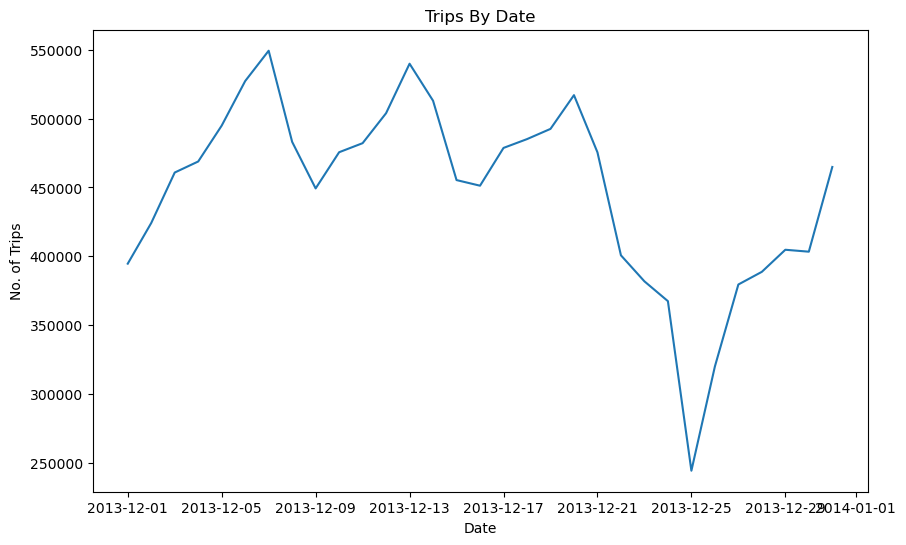

In [54]:
plt.figure(figsize=(10,6))
sns.lineplot(x='date',y='count',data=daily_counts)
plt.title("Trips By Date")
plt.xlabel('Date')
plt.ylabel('No. of Trips')
plt.show()

From above visualization,
There is a sudden fall in number of rides on 25 December i.e. Christmas Day
Depicting that there is a public holiday in New York or People like to enjoy and celebrate christmas at their homes.

# Number of trips by Day

In [55]:
trips_day_name = df_uber_data.groupby('day').size().reset_index(name='count')

In [56]:
trips_day_name

,day,count
0,Friday,1963831
1,Monday,2109935
2,Saturday,1926615
3,Sunday,2138613
4,Thursday,1811398
5,Tuesday,2247500
6,Wednesday,1680400


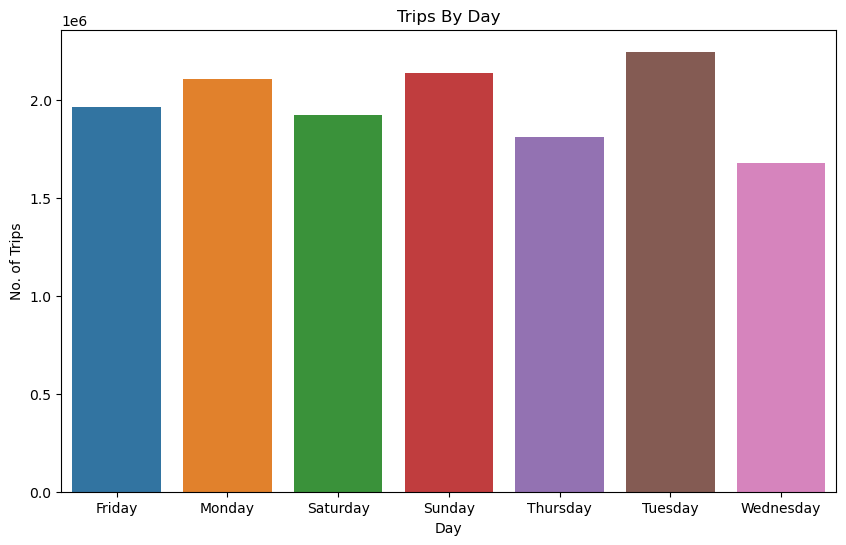

In [57]:
plt.figure(figsize=(10, 6))
sns.barplot(x='day',y='count',data=trips_day_name)
plt.title("Trips By Day")
plt.xlabel('Day')
plt.ylabel('No. of Trips')
plt.show()

Above Visualization shows Tuesday being the busiest while Wednesday being the least busiest day in New York

# Demand of uberrides by Hour

In [58]:
trips_by_hour = df_uber_data.groupby('hour').size().reset_index(name='count')

In [59]:
trips_by_hour.head()

,hour,count
0,0,574698
1,1,427694
2,2,315290
3,3,227557
4,4,167625


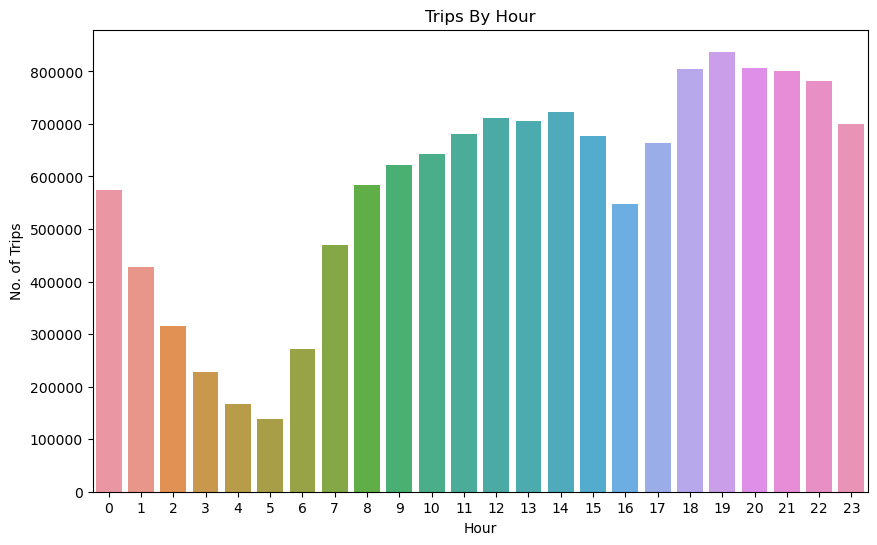

In [60]:
plt.figure(figsize=(10, 6))
sns.barplot(x='hour',y='count',data=trips_by_hour)
plt.title("Trips By Hour")
plt.xlabel('Hour')
plt.ylabel('No. of Trips')
plt.show()

Above Visualization indiactes maximum demand of uber rides occurs between 18:00 Hours to midnight

# Traffic Condition by Day of the week

In [61]:
df_uber_data.columns

Index(['id', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'PULocationID', 'DOLocationID', 'year', 'date',
       'month', 'day', 'hour', 'trip_distance', 'Trip_duration',
       'Average_speed_mph', 'fare_amount', 'tip_amount', 'total_amount',
       'payment_method'],
      dtype='object')

In [62]:
worst_traffic_by_day = df_uber_data.groupby('day')['Average_speed_mph'].median().reset_index(name='count')

In [63]:
worst_traffic_by_day

,day,count
0,Friday,10.470914
1,Monday,11.100000
2,Saturday,11.400000
3,Sunday,12.988235
4,Thursday,10.650000
5,Tuesday,11.336842
6,Wednesday,11.000000


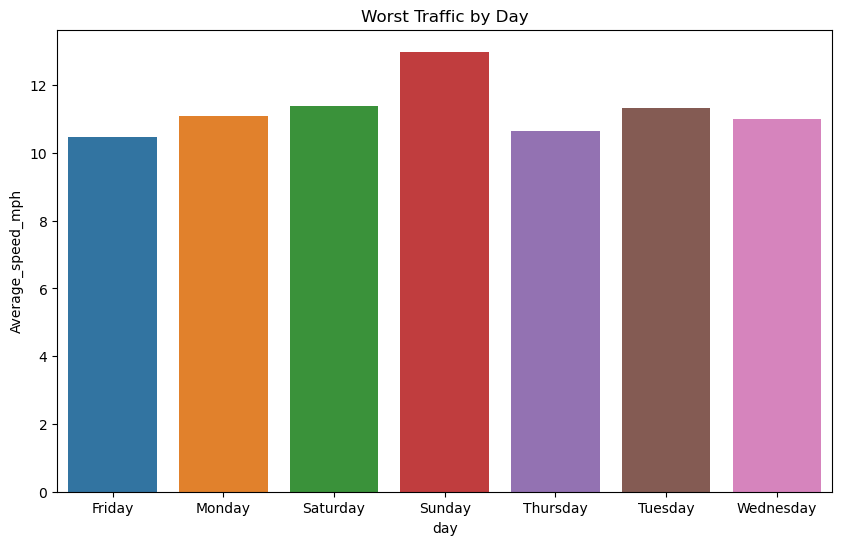

In [64]:
plt.figure(figsize=(10, 6))
sns.barplot(x='day',y='count',data=worst_traffic_by_day)
plt.title("Worst Traffic by Day")
plt.xlabel('day')
plt.ylabel('Average_speed_mph')
plt.show()

# Traffic Condition by Hour of the day

In [65]:
worst_traffic_by_hour = df_uber_data.groupby('hour')['Average_speed_mph'].median().reset_index(name='count')

In [66]:
worst_traffic_by_hour.head()

,hour,count
0,0,14.588684
1,1,15.600000
2,2,16.209287
3,3,16.800000
4,4,18.420000


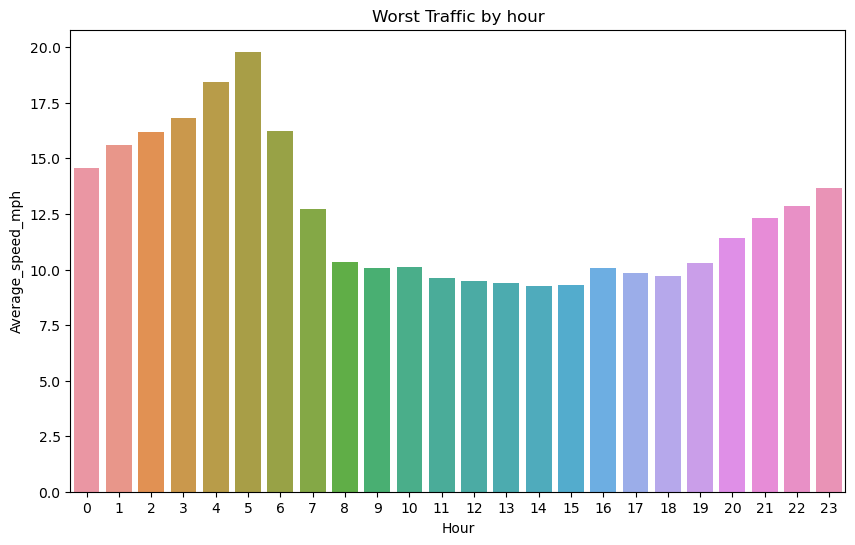

In [67]:
plt.figure(figsize=(10, 6))
sns.barplot(x='hour',y='count',data=worst_traffic_by_hour)
plt.title("Worst Traffic by hour")
plt.xlabel('Hour')
plt.ylabel('Average_speed_mph')
plt.show()

Traffic congestion typically peaks between 8 AM and 12 PM due to morning rush hours, 
as many people commute to work, school, or other activities during this period.

# Number of trips by payment method

In [68]:
Trips_by_payment_method = df_uber_data.groupby('payment_method').size().reset_index(name='count')

In [69]:
Trips_by_payment_method

,payment_method,count
0,Cash,6378271
1,Credit Card,7410902
2,Dispute,8137
3,No Charge,26162
4,Unknown,54820


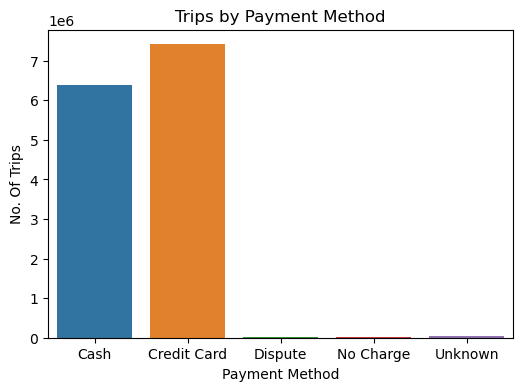

In [70]:
plt.figure(figsize=(6, 4))
sns.barplot(x='payment_method',y='count',data=Trips_by_payment_method)
plt.title("Trips by Payment Method")
plt.xlabel('Payment Method')
plt.ylabel('No. Of Trips')
plt.show()

The results suggest that credit card payments offer convenience and security, which are highly valued by consumers. 
Businesses that offer seamless credit card payment options are likely to enhance customer satisfaction and loyalty.

# Calculating number of trips based on trip_distance

 As the trip distance is varying and vast in numbers. 
 For Simplicity we have to categorize the trip_distance

# Categorizing trip distance

In [71]:
bins = [0,5,10,15,20,25,100]
labels = ['0-5','5-10','10-15','15-20','20-25','25 & above']
df_uber_data['distance_category'] = pd.cut(df_uber_data['trip_distance'], bins=bins, labels=labels)
df_uber_data.head(10)

,id,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,PULocationID,DOLocationID,year,date,month,day,hour,trip_distance,Trip_duration,Average_speed_mph,fare_amount,tip_amount,total_amount,payment_method,distance_category
0,0,2013-12-01 00:23:19,2013-12-01 00:31:48,2,114,170,2013,2013-12-01,12,Sunday,0,2.20,8.483333,15.559921,9.0,0.00,10.00,Cash,0-5
1,1,2013-12-01 00:51:49,2013-12-01 01:01:04,1,48,229,2013,2013-12-01,12,Sunday,0,1.60,9.250000,10.378378,7.5,0.00,8.50,Cash,0-5
2,2,2013-12-01 00:09:39,2013-12-01 00:11:59,1,79,107,2013,2013-12-01,12,Sunday,0,0.30,2.333333,7.714286,3.5,0.90,5.40,Credit Card,0-5
3,3,2013-12-01 00:52:52,2013-12-01 01:02:26,1,95,134,2013,2013-12-01,12,Sunday,0,1.90,9.566667,11.916376,9.0,3.00,13.00,Credit Card,0-5
4,4,2013-12-01 00:19:48,2013-12-01 00:57:07,1,132,127,2013,2013-12-01,12,Sunday,0,21.80,37.316667,35.051362,52.0,11.55,69.38,Credit Card,20-25
5,5,2013-12-01 00:01:52,2013-12-01 00:11:16,1,90,48,2013,2013-12-01,12,Sunday,0,1.60,9.400000,10.212766,8.5,0.00,9.50,Cash,0-5
6,6,2013-12-01 00:15:16,2013-12-01 00:20:27,1,48,161,2013,2013-12-01,12,Sunday,0,0.90,5.183333,10.418006,5.5,1.30,7.80,Credit Card,0-5
7,7,2013-12-01 00:23:50,2013-12-01 00:26:42,1,161,164,2013,2013-12-01,12,Sunday,0,0.60,2.866667,12.558140,4.5,1.00,6.50,Credit Card,0-5
8,8,2013-12-01 00:29:00,2013-12-01 00:46:54,1,164,87,2013,2013-12-01,12,Sunday,0,3.80,17.900000,12.737430,15.0,0.00,16.00,Cash,0-5
9,9,2013-12-01 00:08:00,2013-12-01 00:15:00,5,48,100,2013,2013-12-01,12,Sunday,0,0.89,7.000000,7.628571,6.5,0.00,7.50,Cash,0-5


In [72]:
Trips_by_distance = df_uber_data.groupby('distance_category').size().reset_index(name='count')
Trips_by_distance

,distance_category,count
0,0-5,11930097
1,5-10,1237395
2,10-15,379075
3,15-20,271460
4,20-25,51027
5,25 & above,9238


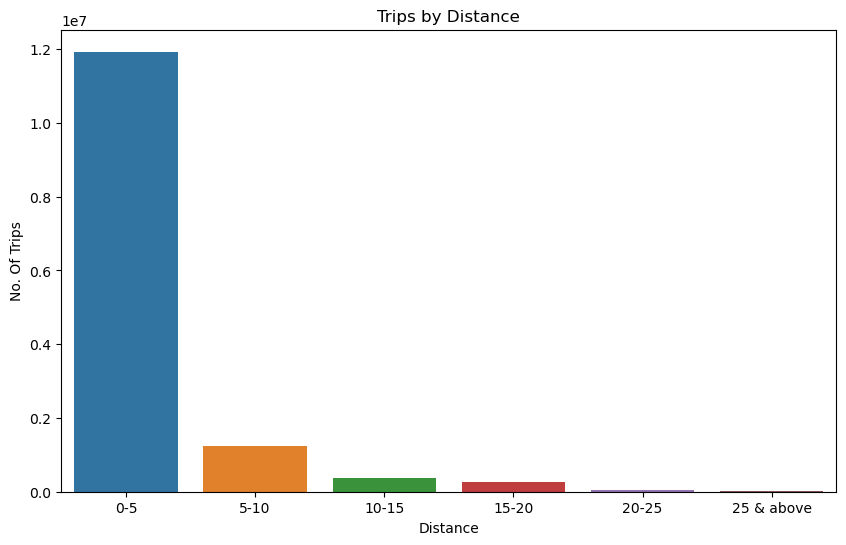

In [73]:
plt.figure(figsize=(10, 6))
sns.barplot(x='distance_category',y='count',data=Trips_by_distance)
plt.title("Trips by Distance")
plt.xlabel('Distance')
plt.ylabel('No. Of Trips')
plt.show()

The results suggest that most of the customer prefer uber rides for distance between 0 to 5 Miles.